# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

A Convolutional Neural Network is needed to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import os
import numpy as np                                                                               # Matrix ops
import pandas as pd                                                                              # Pandas for CSVs
import matplotlib.pyplot as plt                                                                  # Matplotlib for plotting
import math                                                                                      # Math for calculations
import cv2                                                                                       # OpenCV for images
import seaborn as sns                                                                            # Seaborn for graphs
import random                                                                                    # Random number generation
import requests                                                                                  # Http requests

# Tensorflow  and Keras modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # ImageDataGenerator for augmentation
from tensorflow.keras.models import Sequential                                                   # Sequential module for models
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining CNN layers
from tensorflow.keras.optimizers import Adam,SGD                                                 # Optimizers for models
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau

# Scikit-learn modules
from sklearn import preprocessing, metrics                                                       # Preprocessing data
from sklearn.model_selection import train_test_split                                             # Train-test splitting
from sklearn.metrics import confusion_matrix                                                     # Confusion matrix plotting
from sklearn.preprocessing import LabelBinarizer

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Google colab patch of cv2_imshow for image display

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Functions

In [4]:
"""
Downloads a file and saves in Google Colab Files

:param path: The path to the url containing the file you want to download.
:param fileName: The name of the file you are downloading. This will also be the name used when saving.
"""

def downloadFile(path, fileName):
  url = os.path.join(path,fileName)

  if not os.path.exists(fileName):

    response = requests.get(url)
    if response.status_code == 200:
        with open(fileName, "wb") as file:
            file.write(response.content)
            print(f"{fileName} downloaded successfully!")
    else:
        print(f"Failed to download {fileName}.")
  else:
    print(f"{fileName} already exists.")


In [5]:
"""
Creates a subplot for images which has 3 rows and 4 columns.

:param images: A numpy array containing image info
:param labels: A dataframe containing 1D labels of your images.
"""
def plot_images(images,labels):
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Gather all the unique labels
  rows, cols = 3, 4                                                               # Defining number of rows=3
  fig = plt.figure(figsize=(10, 8))                                               # Defines the number of rows and columns in the plot.
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generate a random index
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image at the random index.
          ax.set_title(keys[random_index])
  plt.show()

## Loading the dataset

In [6]:
downloadFile("https://portfoliodata24601.blob.core.windows.net/seedling-classification/", "images.npy")
downloadFile("https://portfoliodata24601.blob.core.windows.net/seedling-classification/", "Labels.csv")

images.npy downloaded successfully!
Labels.csv downloaded successfully!


In [7]:
#Load the images into a numpy array
images = np.load("images.npy")
#Load the labels into a data table.
labels = pd.read_csv("Labels.csv")

## Data Overview

### Understand the shape of the dataset

In [8]:
print(f"Images: {images.shape}")
print(f"Labels: {labels.shape}")

Images: (4750, 128, 128, 3)
Labels: (4750, 1)


#### Observations
* There are 4750 images of size 128x128 with three color channels.
* A 1D array containing labels.

Images[0] will correspond to Labels[0].
Images[23] will correspond to Labels[23] etc.

## Exploratory Data Analysis

### Plot Random Images

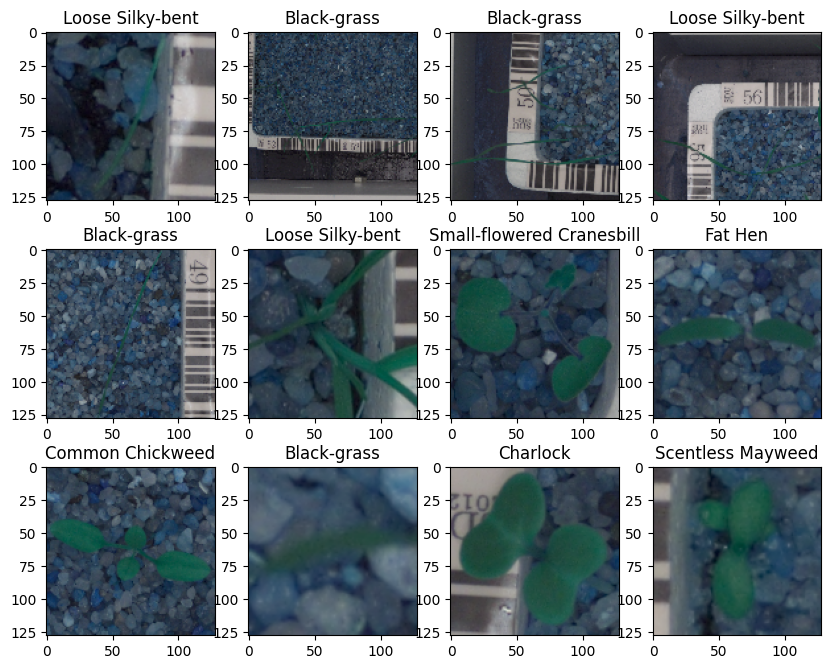

In [9]:
plot_images(images,labels)

### Examine the Data Distribution of the Labels.

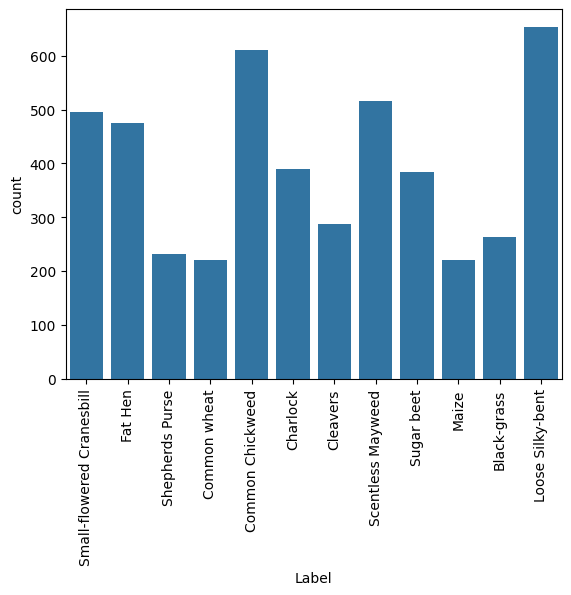

In [10]:
# Use a countplot to look at the label distribution among the data.
sns.countplot(data=labels, x='Label')

# Rotate the X-axis labels for better readability.
plt.xticks(rotation=90)

plt.show()

### Observations

1. **How are these different category plant images different from each other?**

I observed the following differences in the images of plant seedlings:
* Some species have long leaves and some species have round leaves.
* The number of leaves varies between species.
* Some of the images are blurred while some have a crisper focus.
* The plants are photographed at varying heights and magnifications. This can be observed by looking at the size of the rocks in various pictures.
* Some plants are photographed in their entirety while other plants are cut off by the frame.
* There are "distraction" in some of the pictures these would include.
  * A measuring tape.
  * Other plants which may or may not be of the same species.
  * The edge of the planting area which appears as bare dirt (no rocks).

2. **Is the dataset provided an imbalance?**

There is an imbalance in the data.

For example, there are over 600 photos of Loose Silky-Bent while just a little over 200 Common Wheat. The range is about 200 to 600 photos between the plant category photos.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [11]:
# We need to convert our images from BGR format to RGB format in order to work with Tensorflow which accepts images in RGB format.
converted_images = []

#Loop through each image and use cv2 to change the color channels from BGR to RGB.
for image in images:
  new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  converted_images.append(new_image)

#### Original GBR images

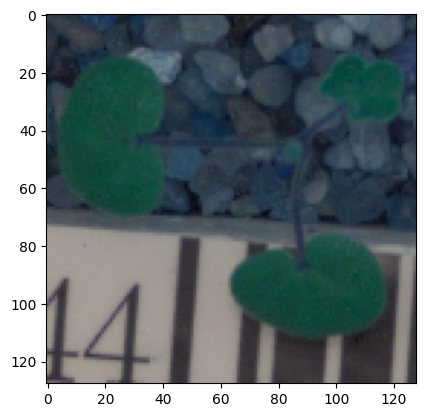

In [12]:
plt.imshow(images[12])

#### New RGB images

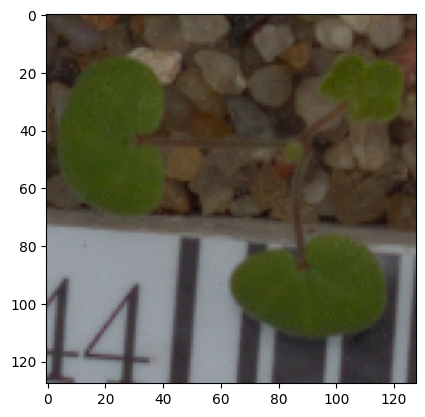

In [13]:
plt.imshow(converted_images[12])

#### Observations
* RGB colors of modified image appear more muted than GBR so the process was successful.

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [14]:
desired_width = 64
desired_height = 64
resized_images = []

# Resize the image to the desired dimensions
for image in converted_images:
  resized_image = cv2.resize(image, (desired_width, desired_height))
  resized_images.append(resized_image)

#### Images before resizing

Images width and height before resizing: 128x128.


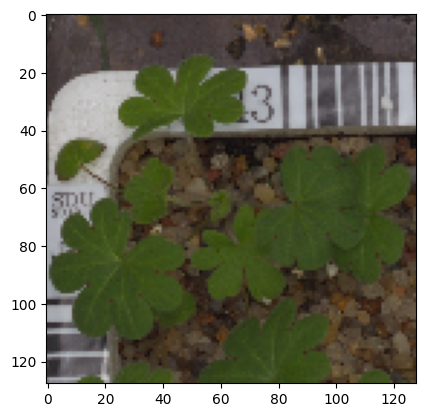

In [15]:
img = converted_images[3]
plt.imshow(img)
print(f"Images width and height before resizing: {img.shape[0]}x{img.shape[1]}.")

#### Images after resizing

Images width and height after resizing: 64x64.


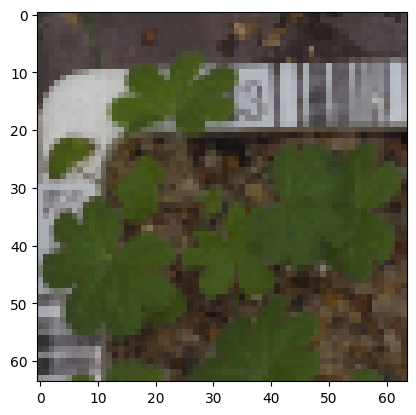

In [16]:
img = resized_images[3]
plt.imshow(img)
print(f"Images width and height after resizing: {img.shape[0]}x{img.shape[1]}.")

#### Observations
* Resized 64x64 images are pixelated when taking up the same size plot of the larger 128x128 images.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

#### Split the Image Dataset into Train, Validate and Test

In [17]:
print(f"Shape of images array: {np.array(resized_images).shape}")

Shape of images array: (4750, 64, 64, 3)


80% of the data is split off into the training set.
From the remaining 20% of the data that is split by 50% leaving the test an validation datasets with 10% of all data.

In [18]:
X_temp, X_train, y_temp, y_train = train_test_split(np.array(resized_images),labels , test_size=0.8, random_state=42,stratify=labels) # Give 80% to training data.
X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp) # Split the remaining 20% temp data between test and validation. This give each 10% of the original set.

In [19]:
print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")
print(f"y_val shape {y_val.shape}")

X_train shape (3800, 64, 64, 3)
X_test shape (475, 64, 64, 3)
X_val shape (475, 64, 64, 3)
y_train shape (3800, 1)
y_test shape (475, 1)
y_val shape (475, 1)


#### Observations
* The test and validation sets have 10% each of the original 4,750 items in the images array.
* The training data set is the largest (as it should be) and it is 80% of the original data.


### Encode the target labels

The LabelBinarizer will create a binary encoding corresponding to each unique label. In this case we have 12 unique labels so the correct label will be represented by a 1 in this representation.

[0 0 0 0 0 0 0 0 **1** 0 0 0]

The 1 corresponds to a specific label.
There can only be one "1" per representation.

By doing this we ensure that our categorical data is compatible with our machine learning algorithms.

In [20]:
# Binarize labels in a one vs. all fashion similar to one-hot encoding.
# Do this for the labels so we can run then through our CNN and get a result.

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normalization

Data Normalization is important for several reasons:

- **Improved Convergence**: Helps the training process to reach a solution faster.
- **Stability and Robustness**: Ensures the training process doesn't get too unpredictable.
- **Better Generalization**: Helps the model to understand different types of images, not just the ones it's seen before.
- **Reduced Overfitting**: Prevents the model from getting too focused on small details that might not be important.
- **Compatibility with Activation Functions**: Makes sure the math inside the model works smoothly.
- **Easier Optimization**: Makes it simpler for the computer to learn from the images.


In [21]:
# Normalize pixel data by dividing every pixel by 255

X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [22]:
# clear the cache
backend.clear_session()

In [23]:
# set the random seeds so we can rerun and achieve the same results.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [24]:
# We are creating a sequential model. Each layer will "fire" in sequential order.
model = Sequential()
model.add(Conv2D(128,(3,3), activation='relu', padding='same', input_shape=(64,64,3)))

In [25]:
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# select the maximum value in each pooling region
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

In [26]:
# flatten the output of the convolution layer into a 1D array to prepare it for the neural network.
model.add(Flatten())

In [27]:
# Build the neural network
model.add(Dense(16, activation='relu'))

# Add dropout to prevent overfitting by "dropping out" 30% of neurons in the CNN.
model.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Using the Adam optimizer
opt = Adam()

# Compile model and set the loss function.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        3

**Model Type**: Sequential model.

**Layers**:
1. Conv2D layer with 128 filters (3x3), ReLU activation.
2. Conv2D layer with 128 filters (3x3), ReLU activation.
3. MaxPooling2D layer (2x2).
4. Conv2D layer with 64 filters (3x3), ReLU activation.
5. MaxPooling2D layer (2x2).
6. Conv2D layer with 64 filters (3x3), ReLU activation.
7. MaxPooling2D layer (2x2).
8. Flatten layer.
9. Dense layer with 16 neurons, ReLU activation.
10. Dropout layer.
11. Dense layer with 12 neurons (softmax activation).

**Parameters**:
- Total: 327,644 (1.25 MB of memory).
- Trainable: 327,644.
- Non-trainable: 0.

<b> Fitting the model on the train data

In [28]:
history = model.fit(
            X_train_normalized,
            y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
119/119 - 13s - loss: 2.4593 - accuracy: 0.1089 - val_loss: 2.4169 - val_accuracy: 0.0947 - 13s/epoch - 113ms/step
Epoch 2/30
119/119 - 3s - loss: 2.2768 - accuracy: 0.1774 - val_loss: 2.0306 - val_accuracy: 0.3368 - 3s/epoch - 24ms/step
Epoch 3/30
119/119 - 3s - loss: 2.0938 - accuracy: 0.2742 - val_loss: 1.9081 - val_accuracy: 0.3411 - 3s/epoch - 24ms/step
Epoch 4/30
119/119 - 3s - loss: 1.9697 - accuracy: 0.2755 - val_loss: 1.7219 - val_accuracy: 0.3621 - 3s/epoch - 24ms/step
Epoch 5/30
119/119 - 3s - loss: 1.9168 - accuracy: 0.2932 - val_loss: 1.7032 - val_accuracy: 0.3705 - 3s/epoch - 25ms/step
Epoch 6/30
119/119 - 3s - loss: 1.8754 - accuracy: 0.2968 - val_loss: 1.6311 - val_accuracy: 0.3579 - 3s/epoch - 24ms/step
Epoch 7/30
119/119 - 3s - loss: 1.8406 - accuracy: 0.3034 - val_loss: 1.5698 - val_accuracy: 0.3853 - 3s/epoch - 24ms/step
Epoch 8/30
119/119 - 3s - loss: 1.7800 - accuracy: 0.3274 - val_loss: 1.4972 - val_accuracy: 0.4632 - 3s/epoch - 24ms/step
Epoch 9/30
11

### Evaluate the model

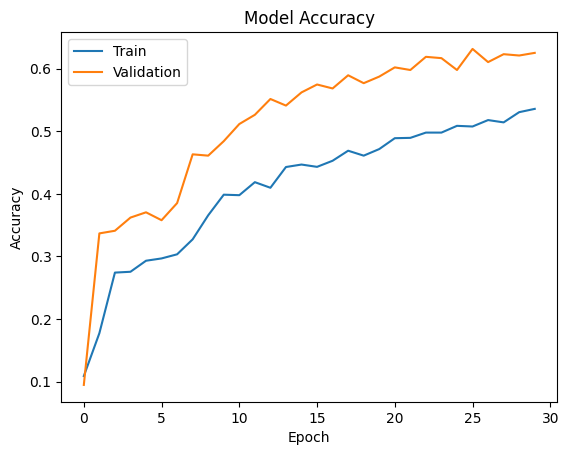

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Observations:

The validation data is performing better in the model than the training data. This can suggest a few things.

* Data Leakage
  * Training data present in validation set.
* Data Imbalance
  * Dispropotionate representation of classes in the validation set.
* Unrepresentative Training Data
  * Training data is not a good representation of the population.
* Data Preprocessing Discrepancies
  * Preprocessing difference between training and validation sets.
* Model Evaluation Methodology
  * Inaccurate reporting of metrics.

Of these options, **Data Imbalance** is the most likely issue. To fix this we can add **Data Augmentation** to the training of the model to see if this will help performance.

#### Evaluate the model on test data

In [30]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.1648 - accuracy: 0.6547 - 134ms/epoch - 9ms/step


#### Plot a Confusion Matrix

In [31]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 7ms/step


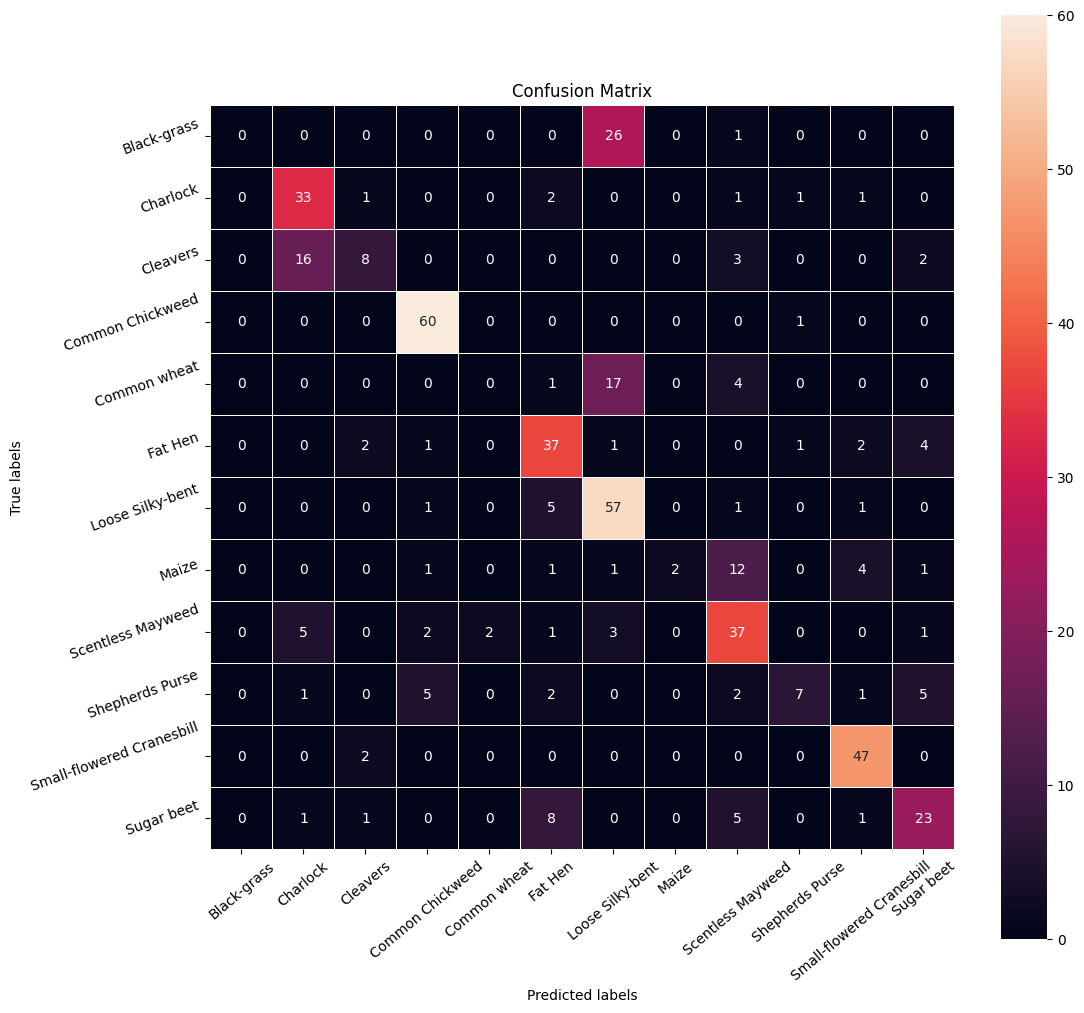

In [32]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

#### Observations
* Ideally, the confusion matrix should show high numbers when comparing like-seedlings. When comparing unlike-seedling there should be a very low number or zero.

There are some issues with this model. For example, Fat Hen is identified as Sugar beet 19 times. In addition, some seedling such as Cleavers have a very small sample size.

**Data Augmentation** might help as it will augment the minority class samples by applying transformations such as rotation, flipping, scaling, cropping, or adding noise. By increasing the diversity of the data of the minority classes it may help the model generalize better.

#### Plot Classification Report

In [33]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.59      0.85      0.69        39
           2       0.57      0.28      0.37        29
           3       0.86      0.98      0.92        61
           4       0.00      0.00      0.00        22
           5       0.65      0.77      0.70        48
           6       0.54      0.88      0.67        65
           7       1.00      0.09      0.17        22
           8       0.56      0.73      0.63        51
           9       0.70      0.30      0.42        23
          10       0.82      0.96      0.89        49
          11       0.64      0.59      0.61        39

    accuracy                           0.65       475
   macro avg       0.58      0.54      0.51       475
weighted avg       0.61      0.65      0.60       475



#### Observations
- **Class Imbalance**: Some classes have very low support which means the actual occurance in the data set is low.

- **Varying Performance**: Precision, recall, and F1-score vary across classes. This suggests an overall issue with classification.

- **Overall Performance**: The model achieves an accuracy of 0.58. There is room for improvement considering the class imbalance.

**Data Augmentation** will help with the class imbalances and should improve the model.


## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [34]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [35]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [36]:
# Set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [37]:
# Intializing a sequential model
model2 = Sequential()

# Add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

#Add Batch Normalization
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Initialize the Adam Optimimzer
opt=Adam()
# Complete the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

#### Observations
* **Model Type**: Sequential model.
* **Layers**:
  * Conv2D layer with 64 filters, each of size 3x3.
  * MaxPooling2D layer with a pool size of 2x2.
  * Conv2D layer with 32 filters, each of size 3x3.
  * MaxPooling2D layer with a pool size of 2x2.
  * BatchNormalization layer.
  * Flatten layer.
  * Dense layer with 16 neurons.
  * Dropout layer.
  * Dense layer with 12 neurons (output layer).
* **Parameters**:
  * Total parameters: 151,676 (592.48 KB Memory).
  * Trainable parameters: 151,612.
  * Non-trainable parameters: 64.

Non-trainable parameters are the batch nomalization layer.

#### Fitting the model on the train data

In [38]:
history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=64,
                                       shuffle=False),
                                       epochs=30,
                                       steps_per_epoch=X_train_normalized.shape[0] // 64,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
59/59 [==============================] - 8s 98ms/step - loss: 2.1357 - accuracy: 0.2342 - val_loss: 2.4014 - val_accuracy: 0.2021 - lr: 0.0010
Epoch 2/30
59/59 [==============================] - 4s 68ms/step - loss: 1.7449 - accuracy: 0.3812 - val_loss: 2.3021 - val_accuracy: 0.1811 - lr: 0.0010
Epoch 3/30
59/59 [==============================] - 4s 68ms/step - loss: 1.5275 - accuracy: 0.4633 - val_loss: 2.2189 - val_accuracy: 0.2779 - lr: 0.0010
Epoch 4/30
59/59 [==============================] - 5s 85ms/step - loss: 1.3673 - accuracy: 0.5260 - val_loss: 2.1004 - val_accuracy: 0.3221 - lr: 0.0010
Epoch 5/30
59/59 [==============================] - 4s 68ms/step - loss: 1.2677 - accuracy: 0.5468 - val_loss: 1.9220 - val_accuracy: 0.5305 - lr: 0.0010
Epoch 6/30
59/59 [==============================] - 5s 86ms/step - loss: 1.1888 - accuracy: 0.5824 - val_loss: 1.6318 - val_accuracy: 0.4821 - lr: 0.0010
Epoch 7/30
59/59 [==============================] - 4s 69ms/step - loss: 1.1

#### Model Evaluation

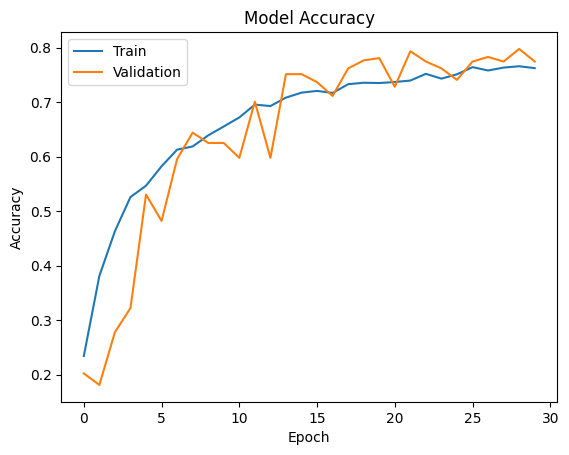

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Observations
This model performs better on both training and validataion data. This show a better overall generalization of the model.

#### Evaluate the model on test data

In [40]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6975 - accuracy: 0.7789 - 84ms/epoch - 6ms/step


#### Observations
An accuracy on test data of 77.9% is in line with training and validation which shows an nice generalized model.

#### Plot the Confusion Matrix

In [41]:
# Get output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


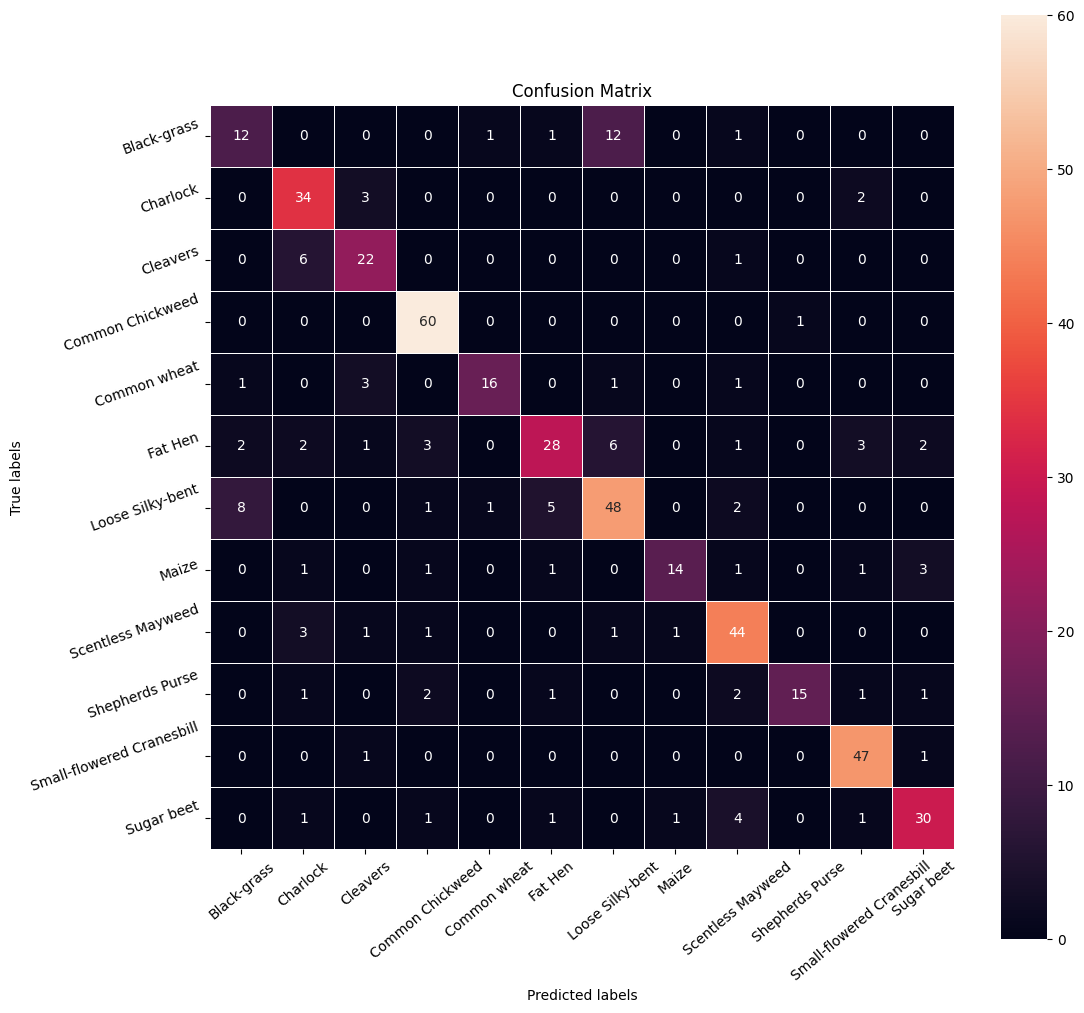

In [42]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

#### Observations
The confusion matrix is much better compare with the original model and with **data augmentation** added. There are a lot higher numbers down the diagonal of the confusion matrix. And while some classes such as black grass and common wheat are showing some issues the model is improved overall.

#### Plot the Classification Report

In [43]:
# Plotting the classification report
cr=metrics.classification_report(y_pred_arg,y_test_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.44      0.52      0.48        23
           1       0.87      0.71      0.78        48
           2       0.76      0.71      0.73        31
           3       0.98      0.87      0.92        69
           4       0.73      0.89      0.80        18
           5       0.58      0.76      0.66        37
           6       0.74      0.71      0.72        68
           7       0.64      0.88      0.74        16
           8       0.86      0.77      0.81        57
           9       0.65      0.94      0.77        16
          10       0.96      0.85      0.90        55
          11       0.77      0.81      0.79        37

    accuracy                           0.78       475
   macro avg       0.75      0.78      0.76       475
weighted avg       0.80      0.78      0.78       475



## Final Model

Model 2 is showing a better overal generalization as training (76.3%), validation (77.5%) and test (77.9%) accuracy are all very similar. Over all it is roughly 15 to 20 percentage point higher than model 1 and does not suffer as much from under representation due to the use of **data augmentation**.

---



### Visualizing the prediction

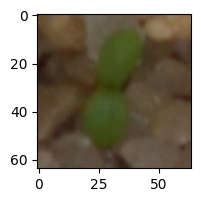

1/1 [==============================] - 0s 174ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


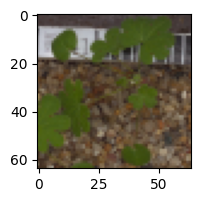

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


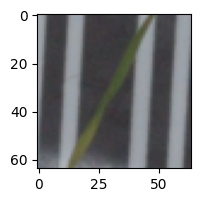

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Loose Silky-bent']
True Label Black-grass


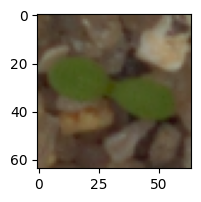

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


In [44]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

## Actionable Insights and Business Recommendations

Here are some key takeaways from the models findings.

- **Efficiency Gains**: This Convolutional Neural Network (CNN) can be used to reduce time and effort for plant classification, allowing focus on higher-level decisions.
- **Improved Crop Yields**: Making more accurate classifications enables targeted interventions for optimized growth and higher yields.
- **Labor Optimization**: By automating plant identification, labor is freed up for value-added activities, boosting productivity and cutting costs.
- **Long-Term Impact**: By investing in AI, this positions agriculture for long-term success in a rapidly evolving ag-tech landscape.
- **Scalability and Adaptability**: The current CNN demonstrates generalization across datasets, suitable for diverse agricultural settings. Continuous improvement of the model will produce greater future results.
- **Research and Development**: Investing in R&D ensures competitiveness and adaptation to evolving needs of the agricultural industry.



_____